<a href="https://colab.research.google.com/github/Larissabraz/AtividadesbootcampMIA/blob/main/Exercicio%205%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Célula para executar no colab e ter acesso aos arquivos que estão no Google Drive
# Descomente caso isso seja necessário

from google.colab import drive
drive.mount('/content/drive')

# o resultado da celula te dirá em qual pasta você consegue acessar o seu drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [56]:
from sklearn.feature_selection import mutual_info_classif

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
df = pd.read_csv('heart_failure_predict.csv')


In [59]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [60]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [61]:
df.shape

(368, 60)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [63]:
df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [64]:
df.Mortality.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

# **Seleção de variáveis:**
Antes de selecionar precisamos tratar as variáveis categóricas que estão como objeto, vamos usar o hot_encodign ou dummies:

In [65]:
cat_columns = []
for c in df.columns:
    if df[c].dtype=='object': 
        cat_columns.append(c)


In [66]:
cat_columns

['Age.Group',
 'Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [67]:
# a variavel Age.Group é ordinal, então vamos usar o label_encoding para ela
cat_columns.remove('Age.Group')

cat_columns

['Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [68]:
df2 = pd.get_dummies(df, columns=cat_columns) # fazendo a cópia para não alterar o dataset original

In [69]:
df2.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,41-50,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,51-60,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,51-60,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,51-60,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,51-60,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [70]:
le = LabelEncoder()

df2['Age.Group'] = le.fit_transform(df['Age.Group'])

In [71]:
le.classes_

array(['21-30', '31-40', '41-50', '51-60', '61-70'], dtype=object)

In [72]:
len(df2.columns)

167

In [73]:
X = df2.copy()
X.drop(columns='Mortality', inplace=True)

In [74]:
y = df2['Mortality']

Vamos remover primeiro as variáveis que são altamente correlacionadas entre si

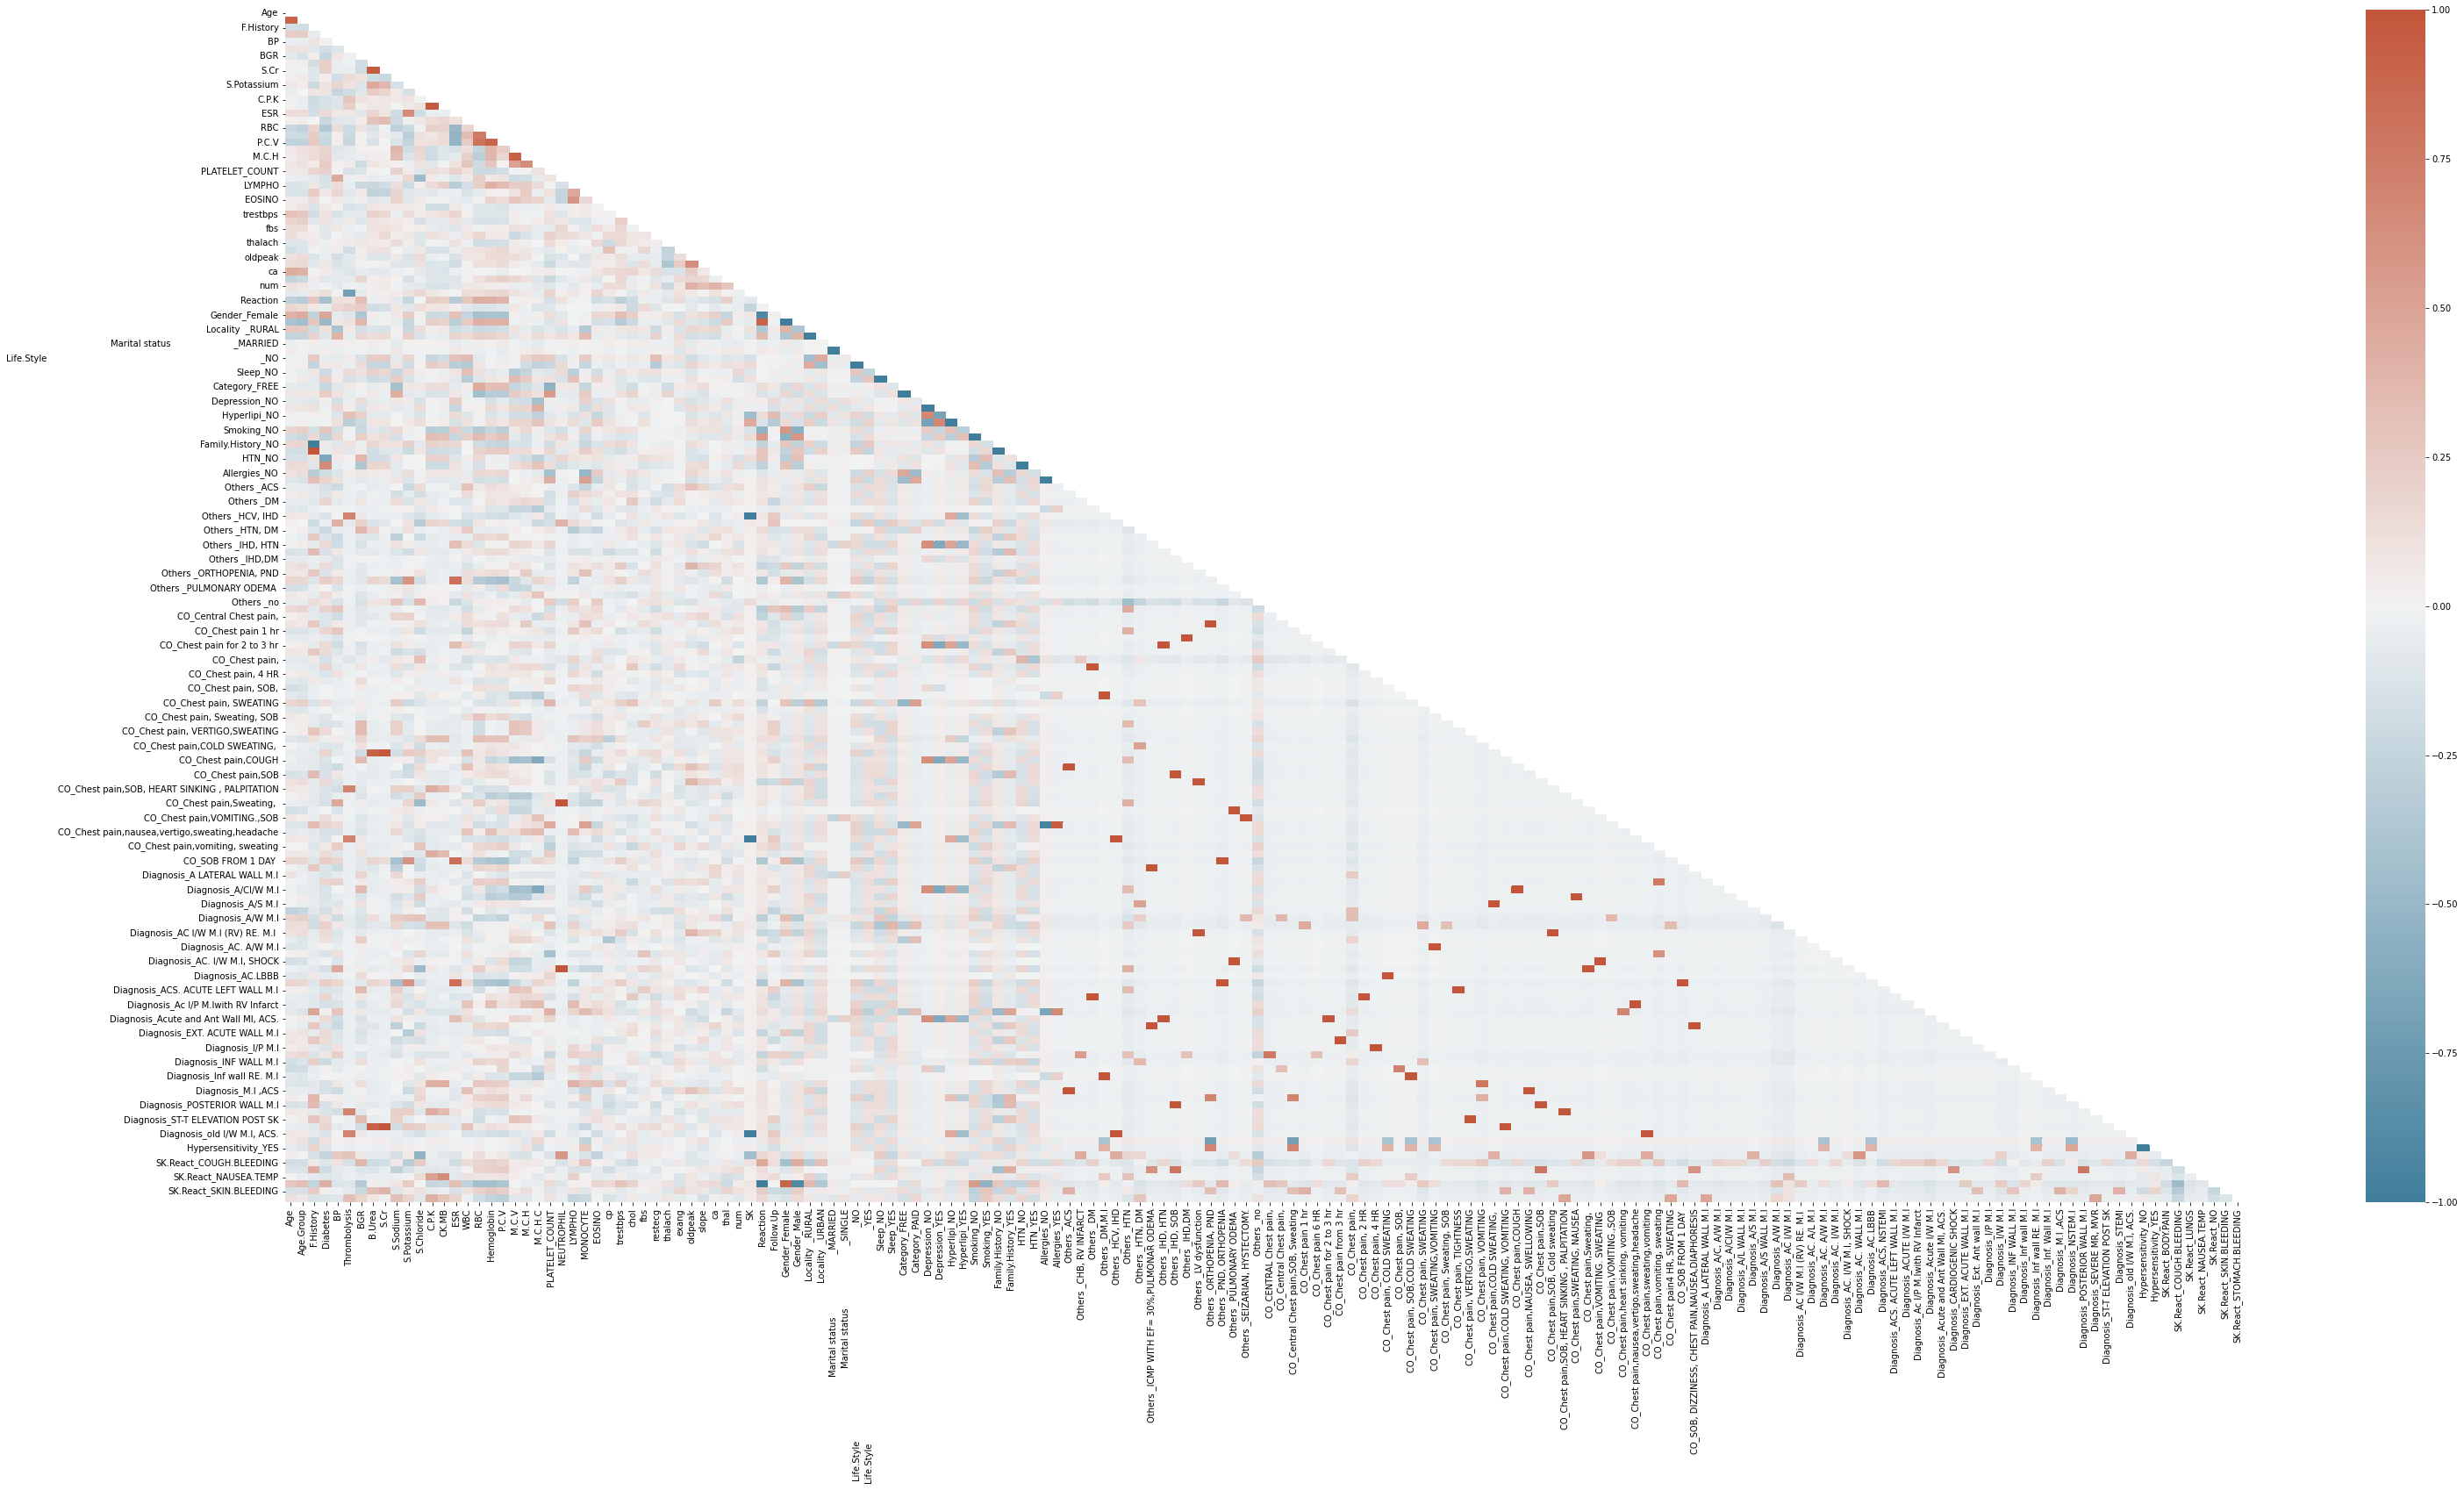

In [75]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [76]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital status                       _MARRIED - Marital status                       _SINGLE
Life.Style                                                                              _NO - Life.Style                                                                              _YES
Sleep_NO - Sleep_YES
Category_FREE - Category_PAID
Depression_NO - Depression_YES
Hyperlipi_NO - Hyperlipi

In [77]:
len(correlated_features)

60

In [78]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DIAPHORESIS',
 'Category_FREE',
 'Depression_NO',
 'F.History',
 'Family.History_NO',
 'Gender_Female',
 'Gender_Male',
 'HTN_NO',
 'Hyperlipi_NO',
 'Hypersen

In [79]:
# para clareza na hora da analise, não vamos remover o genero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [80]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [81]:
len(X_novo.columns)

106

Estimar informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes, e valores mais altos significam maior dependência.

Text(0.5, 1.2, 'Kepler Variable Importance (mutual_info_classif)')

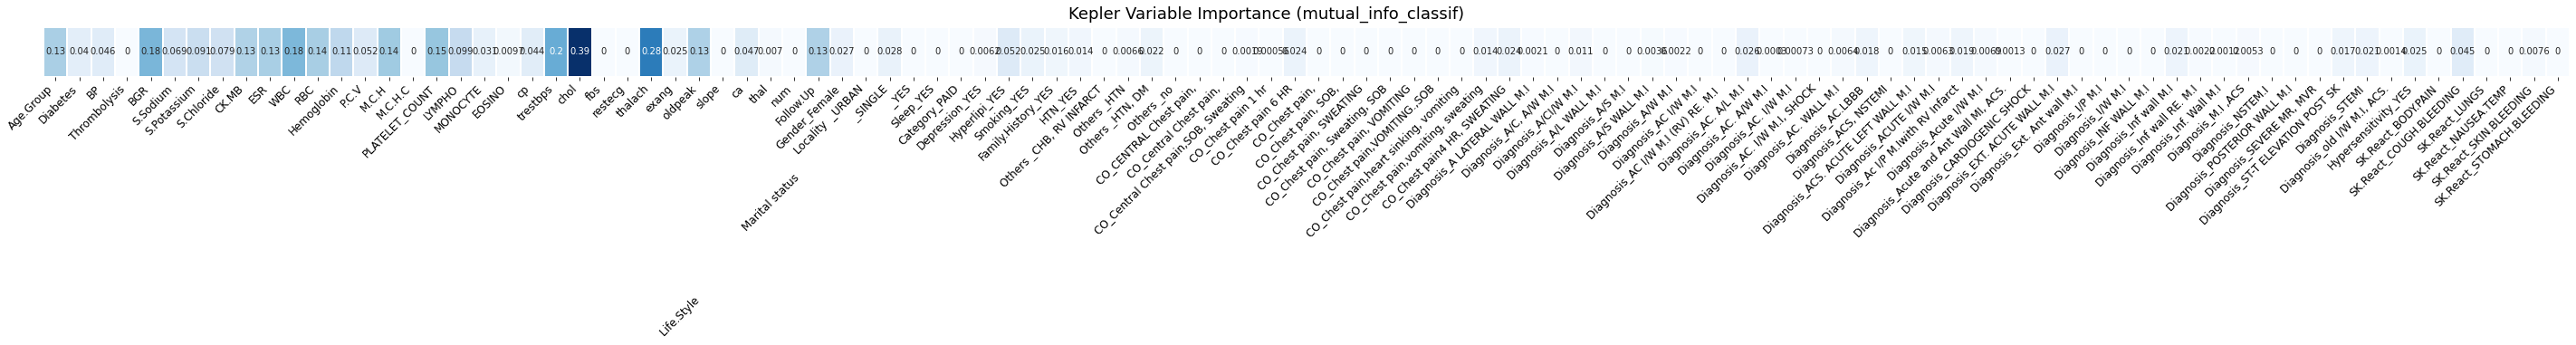

In [82]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)

Variáveis como sono, alergias e hipersensibilidade não afetam na mortalidade, tendo valor de MI igual a 0, enquanto variáveis como chol, thalach e idade, afetam mais diretamente a Mortalidade

In [83]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 30  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=30)
X_novo2 = trans.fit_transform(X_novo, y)

In [84]:
trans.get_support()

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [85]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'Diabetes', 'BP', 'BGR', 'S.Sodium', 'S.Potassium',
       'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.H',
       'PLATELET_COUNT', 'LYMPHO', 'EOSINO', 'trestbps', 'chol', 'thalach',
       'oldpeak', 'ca', 'num', 'Follow.Up', 'CO_Chest pain 1 hr',
       'Diagnosis_A/C, A/W M.I', 'Diagnosis_A/S M.I', 'Diagnosis_AC I/W M.I',
       'Diagnosis_AC. A/L M.I', 'Diagnosis_AC. WALL M.I',
       'Diagnosis_CARDIOGENIC SHOCK', 'Diagnosis_EXT. ACUTE WALL M.I',
       'Diagnosis_M.I ,ACS'],
      dtype='object')

In [86]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])
X_novo2.head()

,Age.Group,Diabetes,BP,BGR,S.Sodium,S.Potassium,CK.MB,ESR,WBC,RBC,...,Follow.Up,CO_Chest pain 1 hr,"Diagnosis_A/C, A/W M.I",Diagnosis_A/S M.I,Diagnosis_AC I/W M.I,Diagnosis_AC. A/L M.I,Diagnosis_AC. WALL M.I,Diagnosis_CARDIOGENIC SHOCK,Diagnosis_EXT. ACUTE WALL M.I,"Diagnosis_M.I ,ACS"
0,2.0,1.0,100.6,84.0,138.0,3.3,30.0,11.0,9900.0,4.26,...,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,0.0,90.6,135.0,144.0,4.7,30.0,27.0,15800.0,5.74,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,100.7,146.0,137.0,4.2,22.0,19.0,7900.0,4.83,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,160.1,146.0,137.0,4.2,22.0,19.0,7900.0,4.83,...,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1.0,90.6,85.0,139.0,4.5,18.0,13.0,6900.0,4.41,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Features prontas! Vamos balancear as classes

In [87]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [88]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [89]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [90]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [91]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [92]:
X_train.shape

(460, 32)

In [93]:
X_test.shape

(74, 32)

# **Treinamento**
Esse nosso primeiro modelo será uma K Nearest Neighbors (KNN). O scikit-learn já contém uma implementação do KNN.

O Scikit Learn tem a implementação de vários outros algoritmos: aqui!

# **Tarefa de casa:**
Teste o KNN com diferentes valores de k! Qual K é o melhor para esse problema?


---



*   Mudando o N para 5



In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:

neigh = KNeighborsClassifier(n_neighbors=5)

In [96]:
# Treinamento do modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier()

# **Avaliando nosso modelo**
Agora precisamos avaliar se o modelo está bom ou não!

Para isso, precisamos utilizá-lo para realizar as predições para nosso conjunto de teste

In [97]:
preds = neigh.predict(X_test)
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [98]:
neigh.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0. ,

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.918918918918919

**Avaliando a matriz de confusão:**

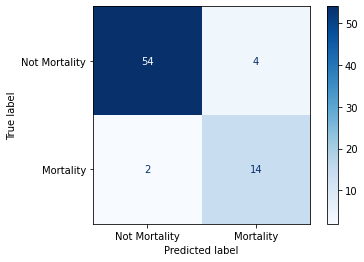

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, preds)
# plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

**avaliando a precisão e recall do nosso modelo:**

In [101]:
print(classification_report(y_test, preds, target_names=['not_Mortality', 'Mortality']))

               precision    recall  f1-score   support

not_Mortality       0.96      0.93      0.95        58
    Mortality       0.78      0.88      0.82        16

     accuracy                           0.92        74
    macro avg       0.87      0.90      0.89        74
 weighted avg       0.92      0.92      0.92        74



**AUC-ROC**

In [102]:
from sklearn.metrics import roc_curve, auc

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)

auc(fpr, tpr)

0.9030172413793103

**Modelo sem a seleção de features e sem balanceamento??**

In [103]:
X.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,2,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,3,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,3,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,3,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,3,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [104]:

y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [105]:
X_train_semfe, X_test_semfe, y_train_semfe, y_test_semfe = train_test_split(X, y, test_size=.2, random_state=1)

# Instanciando o classificador
neigh_semfe = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh_semfe.fit(X_train_semfe, y_train_semfe)

KNeighborsClassifier()

               precision    recall  f1-score   support

not_Mortality       0.92      0.95      0.93        58
    Mortality       0.79      0.69      0.73        16

     accuracy                           0.89        74
    macro avg       0.85      0.82      0.83        74
 weighted avg       0.89      0.89      0.89        74

AUC: 0.8178879310344828


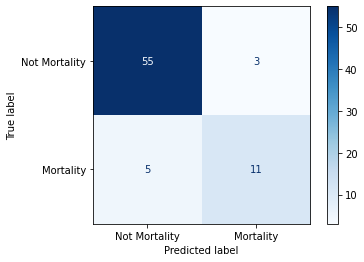

In [106]:
preds_semfe = neigh_semfe.predict(X_test_semfe)

cm_semfe = confusion_matrix(y_test_semfe, preds_semfe)

# plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_semfe, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test_semfe, preds_semfe, target_names=['not_Mortality', 'Mortality']))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr_semfe, tpr_semfe, thresholds_semfe = roc_curve(y_test_semfe, preds_semfe)

print('AUC: ' + str(auc(fpr_semfe, tpr_semfe)))

**Que outras coisas poderiamos fazer com o dataset para melhorar nossos resultados?**
***Tarefa de casa:***

mudar o threshold de correlação que está em 0.9 para outros valores


---


aumentar ou diminuir a quantidade de features selecionadas pelo mutual information


---


descobrir outras funções de distância

**Alterar o threshold de correlação**

In [107]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
Diabetes - HTN_NO
Diabetes - HTN_YES
Thrombolysis - SK
Thrombolysis - Others _HCV, IHD
Thrombolysis - CO_Chest pain,SOB, HEART SINKING , PALPITATION
Thrombolysis - CO_Chest pain,sweating,vomiting
Thrombolysis - Diagnosis_SEVERE MR, MVR
Thrombolysis - Diagnosis_old I/W M.I, ACS.
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
S.Potassium - ESR
C.P.K - CK.MB
CK.MB - SK.React_NAUSEA.TEMP
ESR - Others _PND, ORTHOPENIA
ESR - CO_SOB FROM 1 DAY 
ESR - Diagnosis_ACS, NSTEMI
RBC - Hemoglobin
RBC - P.C.V
Hemoglobin - P.C.V
M.C.V - M.C.H
M.C.H - M.C.H.C
M.C.H.C - CO_Chest pain,COUGH
M.C.H.C - Diagnosis_A/CI/W M.I
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
oldpeak - slope
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female


In [108]:
len(correlated_features)

79

In [109]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CK.MB',
 'CO_CENTRAL Chest pain,',
 'CO_Central Chest pain,SOB, Sweating',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain, VOMITING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,heart sinking, vomiting',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_Chest pain,vomiting, sweating',
 'CO_SOB FRO

In [110]:

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')
X_novo = X.drop(labels=correlated_features, axis=1)
len(X_novo.columns)

87

In [111]:
# Mudando para 30 variáveis
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=30)
X_novo2 = trans.fit_transform(X_novo, y)
trans.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False])

In [112]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'BP', 'BGR', 'S.Sodium', 'S.Chloride', 'WBC', 'P.C.V',
       'PLATELET_COUNT', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'trestbps', 'chol',
       'restecg', 'thalach', 'ca', 'Follow.Up', 'Gender_Female', 'Sleep_YES',
       'Diagnosis_A/C, A/W M.I', 'Diagnosis_AC I/W M.I',
       'Diagnosis_Acute and Ant Wall MI, ACS.',
       'Diagnosis_EXT. ACUTE WALL M.I', 'Diagnosis_Ext. Ant wall M.I',
       'Diagnosis_STEMI', 'SK.React_BODY.PAIN'],
      dtype='object')

In [113]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]


dead_upsampled = resample(dead,
                          replace=True, 
                          n_samples=len(not_dead), 
                          random_state=13) 


upsampled = pd.concat([not_dead, dead_upsampled])


upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [115]:
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=3)
preds = neigh.predict(X_test)
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [116]:
neigh.predict_proba(X_test)


array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

               precision    recall  f1-score   support

not_Mortality       0.96      0.93      0.95        58
    Mortality       0.78      0.88      0.82        16

     accuracy                           0.92        74
    macro avg       0.87      0.90      0.89        74
 weighted avg       0.92      0.92      0.92        74



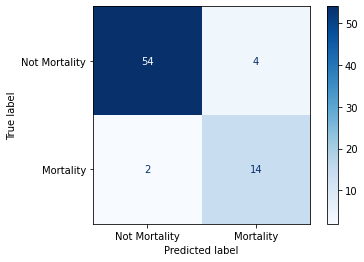

In [117]:
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test, preds, target_names=['not_Mortality', 'Mortality']))